In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, UpSampling2D

import numpy as np
import matplotlib.pyplot as plt

In [2]:
input_layer = Input(shape=(28, 28, 1))
conv_layer = Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(input_layer)
transpose_conv_layer = Conv2DTranspose(filters=1, kernel_size=(3, 3), activation='sigmoid', padding='same')(conv_layer)
model = Model(inputs=input_layer, outputs=transpose_conv_layer)

In [3]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [4]:
X_train = np.random.rand(1000, 28, 28, 1)
y_train = X_train
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0787 - val_loss: 0.0620
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0558 - val_loss: 0.0371
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0317 - val_loss: 0.0185
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0156 - val_loss: 0.0093
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0081 - val_loss: 0.0055
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0051 - val_loss: 0.0039
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0037 - val_loss: 0.0030
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0029 - val_loss: 0.0025
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0024 - val_loss: 0.0021
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0021 - val_loss: 0.0019


In [5]:
X_test = np.random.rand(200, 28, 28, 1)
y_test = X_test

loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0019
Test loss: 0.0019199538510292768


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


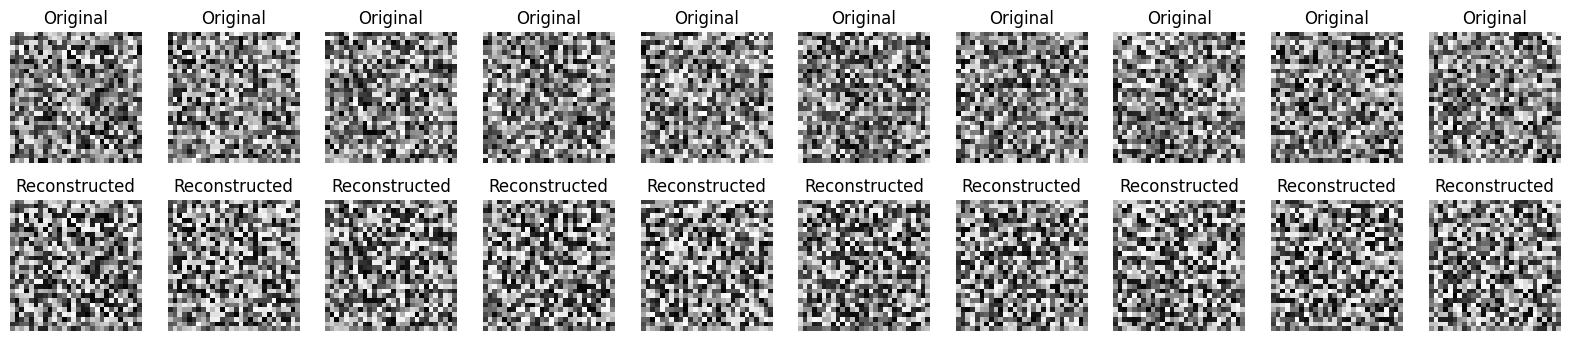

In [6]:
y_pred = model.predict(X_test)

n = 10

plt.figure(figsize=(20, 4))

for i in range(n):

    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')
    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(y_pred[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()